# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [3]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                        'parks_around3000': 'parks_around_3000', 
                        'ponds_around3000': 'ponds_around_3000',
                        'studio': 'is_studio',
                        'open_plan': 'is_open_plan'
                       })

1. **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)
2. **balcony** — число балконов
3. **ceiling_height** — высота потолков (м)
4. **city_centers_nearest** — расстояние до центра города (м)
5. **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)
6. **first_day_exposition** — дата публикации
7. **floor** — этаж
8. **floors_total** — всего этажей в доме
9. **is_apartment** — апартаменты (булев тип)
10. **kitchen_area** — площадь кухни в квадратных метрах (м²)
11. **last_price** — цена на момент снятия с публикации
12. **living_area** — жилая площадь в квадратных метрах (м²)
13. **locality_name** — название населённого пункта
14. **is_open_plan** — свободная планировка (булев тип)
15. **parks_around_3000** — число парков в радиусе 3 км
16. **parks_nearest** — расстояние до ближайшего парка (м)
17. **ponds_around_3000** — число водоёмов в радиусе 3 км
18. **ponds_nearest** — расстояние до ближайшего водоёма (м)
19. **rooms** — число комнат
20. **is_studio** — квартира-студия (булев тип)
21. **total_area** — общая площадь квартиры в квадратных метрах (м²)
22. **total_images** — число фотографий квартиры в объявлении

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  is_studio             23699 non-null  bool   
 11  is_open_plan          23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
    
* Примерно у половины строк отсутствует значение высоты потолка (***ceiling_height***).
* Небольшое количество пропусков в столбце ***floors_total***, можно удалить.
* У части объявлений не указана информация о жилой площади (***living_area***).
* Небольшое количество пропусков в столбце ***kitchen_area***.
* Пропуски в ***balcony***, можно заменить на 0.
* В нескольких объялениях не указано название населённого пункта (***locality_name***), можно удалить.
* Пропуски в ***airports_nearest*** и ***city_centers_nearest***.
* Проблема с данными по паркам и водоемам. Непустых значений у столбцов ***ponds_nearest*** и ***parks_nearest*** вдвое меньше, чем у столбцов ***ponds_around_3000*** и ***parks_around_3000***. Возможно, неисправна система получения картографических данных.

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
    
* В большинстве столбцов слишком большая разница значений между третьим квартилем и максимальным значением.

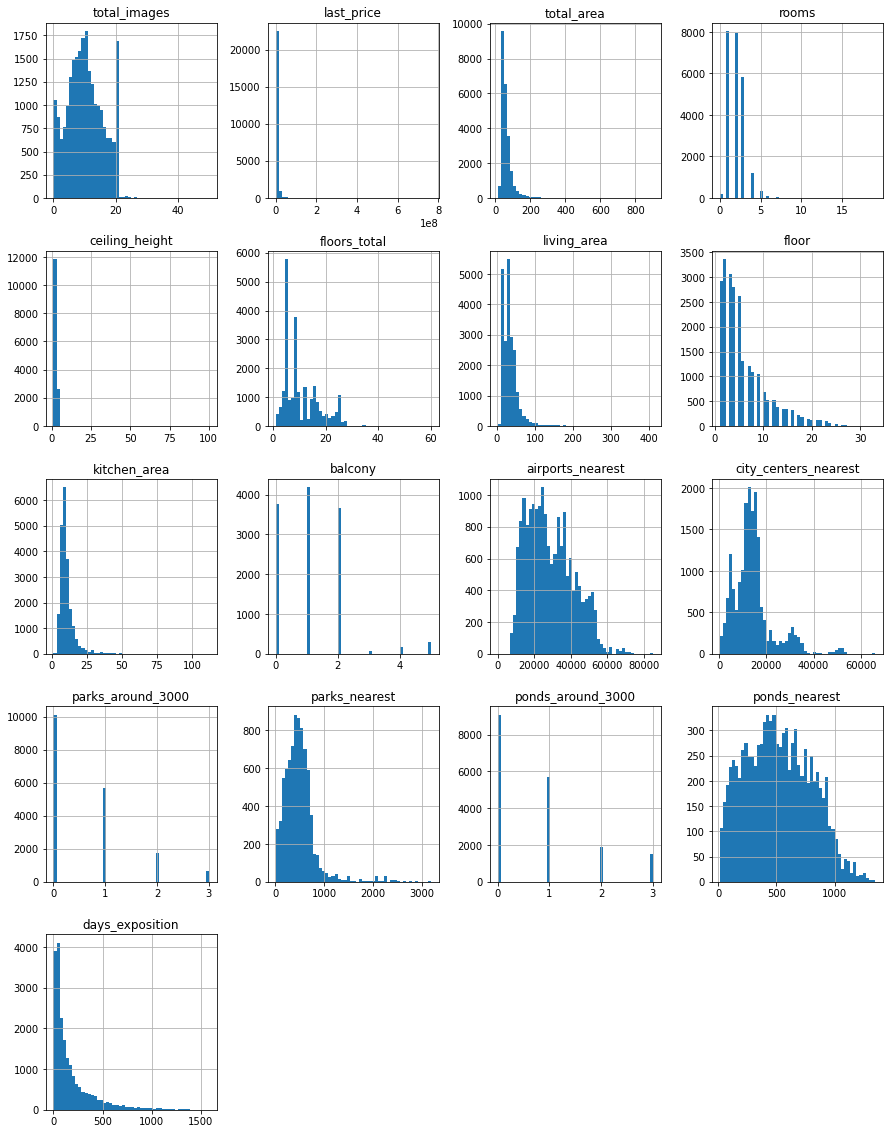

In [6]:
data.hist(figsize=(15, 20), bins=50);

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
    
* **total_images:** в основном выкладывают по 10 или 20 картинок.
* **last_price:** присутствуют объявления со слишком большой ценой, из-за чего проблематично проанализировать данные по гистограмме.
* **total_area:** присутствуют объявления со слишком большой площадью; большинство квартир имеют площадь от 12 до примерно 250 $м^2$.
* **rooms:** продаются в основном квартиры с с количеством комнат 1-5; есть небольшое количество объявлений с большим количеством комнат.
* **ceiling_height:** присутствуют данные с аномальными значениями, например, минимальное 1 м, максимальное 100 м.
* **floors_total:** без комментариев.
* **living_area:** есть слишком маленькие жилые площади (минимальное 2 $м^2$).
* **floor:** без комментариев.
* **kitchen_area:** аномальные минимальное (1,3 $м^2$) и максимальное (112 $м^2$) значение площади кухни.
* **balcony:** без комментариев.
* **airports_nearest:** есть нулевые значения.
* **city_centers_nearest:** без комментариев.
* **parks_around_3000:** без комментариев.
* **parks_nearest:** возможно аномальные минимальное (1 м) и максимальное (3190 м) значения.
* **ponds_around_3000:** без комментариев.
* **ponds_nearest:** без комментариев.
* **days_exposition:** без комментариев.

### Предобработка данных

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
    
Так как строк с пропущенными значениями в столбцах ***floors_total***, ***locality_name*** было немного по отношению к общему числу и их невозможно достоверно заполнить, то принято решение их удалить. Данные пропуски могли возникнуть из-за ошибки пользователя или системы.

In [9]:
# удалим те строки, в которых пропущены значения в столбцах floors_total, locality_name
data.dropna(subset=['floors_total','locality_name'], inplace=True)
# заменям тип данных на int
data['floors_total'] = data['floors_total'].astype('int')

#### balcony

In [10]:
# уникальные значения столбца 'balcony' и их количество
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

Пропуски могли возникнуть в следствие того, что пользователь не указал отсутствие балкона, т.е. не ввёл 0.

In [11]:
# замена отсутствующих значений на 0
data['balcony'].fillna(0, inplace=True)

In [12]:
# проверка качества замены
data['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

In [13]:
# преобразование в int
data['balcony'] = data['balcony'].astype('int8')

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

Данное преобразование требуется для уменьшения занимаемой памяти.

#### first_day_exposition

In [14]:
data['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [15]:
# переовод first_day_exposition в формат даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
    
Перевод в формат даты нужен для удобства работы с данными.

#### is_apartment

In [16]:
data['is_apartment'].value_counts()

False    2710
True       50
Name: is_apartment, dtype: int64

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

Пропуски могли возникнуть в следствие того, что пользователь не указал является ли выставленная недвижимость апартаментами.

In [17]:
# будем считать, что пропущенные значения в is_apartment являются False
data['is_apartment'].fillna(False, inplace=True)
data['is_apartment'].value_counts()

False    23515
True        50
Name: is_apartment, dtype: int64

In [18]:
# переовод is_apartment в формат boolean
data['is_apartment'] = data['is_apartment'].astype('bool')

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

Данное преобразование требуется для уменьшения занимаемой памяти и удобства работы с данными.

#### locality_name

In [19]:
# проверка уникальных значений
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [20]:
data['locality_name'].nunique()

364

In [21]:
# замена дубликатов
data['locality_name'] = data['locality_name'].str.replace('поселок', 'посёлок')
data['locality_name'].nunique()

330

In [22]:
data['locality_name'] = data['locality_name'].str.replace('посёлок городского типа', 'посёлок')
data['locality_name'].nunique()

329

In [23]:
data['locality_name'] = data['locality_name'].str.replace('городской посёлок', 'посёлок')
data['locality_name'].nunique()

322

In [24]:
data['locality_name'] = data['locality_name'].str.replace('при железнодорожной станции', 'станции')
data['locality_name'].nunique()

320

In [25]:
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое', 'садовое')
data['locality_name'].nunique()

320

In [26]:
# контрольная проверка
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

In [27]:
# check
data.locality_name.nunique()

320

#### ceiling_height

<AxesSubplot:>

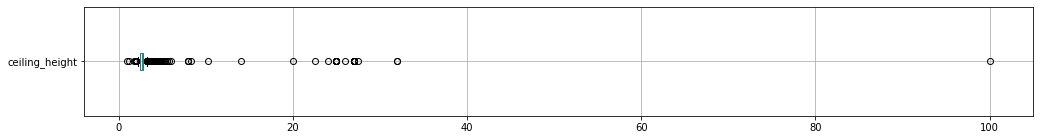

In [28]:
# проверка столбца ceiling_height
data.boxplot(column='ceiling_height', figsize=(17,2), vert=False)

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
    
* Есть некоторое количество объявлений с слишком большим значением высоты потолка. В некоторых могли по ошибке вписать число без точки.
* Присутствую слишком маленькие значения, потолки в жилых помещениях не могут иметь такую высоту.

<AxesSubplot:>

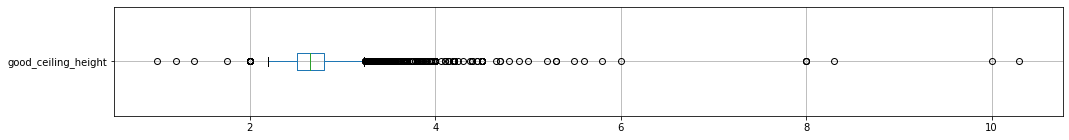

In [29]:
# есть аномальные значения, в которых могли пропустить точку в числе
# 12 м - высота примерно в 4 этажа, будем считать её нормальной высотой
# значения больше 12 м будем делить на 10
data['good_ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 12, data['ceiling_height'] / 10)
data.boxplot(column='good_ceiling_height', figsize=(17,2), vert=False)

In [30]:
# проверка столбца
data['good_ceiling_height'].describe()

count    14481.000000
mean         2.728455
std          0.305953
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         10.300000
Name: good_ceiling_height, dtype: float64

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

Согласно СП 54.13330.2022 п.5.12, высота (от пола до потолка) жилых комнат и кухни (кухни-столовой) в климатических
подрайонах строительства IА, IБ, IГ, IД и IVА, определяемых по СП 131.13330, должна быть не
менее 2,7 м, а в других климатических подрайонах строительства - не менее 2,5 м.
   

Удаляем те значения ***good_ceiling_height***, что меньше 2,5 м или больше 6 м, так как их мало и такие квартиры в жизни редко встречаются.

In [31]:
data['good_ceiling_height'] = \
data.loc[(data['good_ceiling_height']>=2.5) & (data['good_ceiling_height']<=6), 'good_ceiling_height']

<AxesSubplot:>

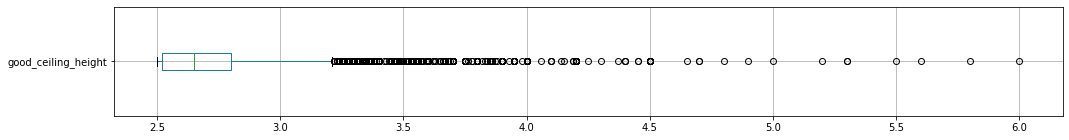

In [32]:
data.boxplot(column='good_ceiling_height', figsize=(17,2), vert=False)

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

Так как имеется большое количество пропусков, стоит разделить объявления на группы и заполнить медианными значениями. Как правило, чем ниже класс квартиры, тем ниже потолок.
    
Это сделаем позже, когда будем определять стоимость $м^2$.

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  is_studio             23565 non-null  bool          
 11  is_open_plan          23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

In [34]:
data.describe().style.format("{:,.2f}")

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,good_ceiling_height
count,"23,565.00","23,565.00","23,565.00","23,565.00","14,481.00","23,565.00","21,700.00","23,565.00","21,343.00","23,565.00","18,041.00","18,064.00","18,065.00","8,030.00","18,065.00","9,036.00","20,394.00","14,398.00"
mean,9.88,"6,540,058.26",60.32,2.07,2.77,10.68,34.45,5.88,10.56,0.59,"28,797.08","14,192.66",0.61,490.58,0.77,518.29,180.74,2.73
std,5.68,"10,910,934.72",35.66,1.08,1.26,6.59,22.05,4.87,5.90,0.96,"12,632.50","8,613.35",0.80,341.57,0.94,278.01,219.73,0.28
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00,2.50
25%,6.00,"3,400,000.00",40.00,1.00,2.51,5.00,18.60,2.00,7.00,0.00,"18,565.00","9,238.00",0.00,288.00,0.00,293.00,45.00,2.52
50%,9.00,"4,646,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,0.00,"26,757.00","13,096.50",0.00,455.00,1.00,503.00,95.00,2.65
75%,14.00,"6,790,000.00",69.70,3.00,2.80,16.00,42.30,8.00,12.00,1.00,"37,273.00","16,285.00",1.00,612.00,1.00,730.00,231.00,2.80
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00",6.00


#### total_area

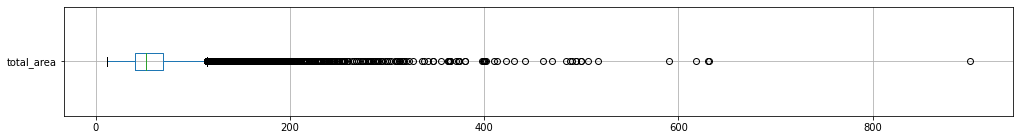

In [35]:
# проверка столбцов с аномальными значениями
data.boxplot(column='total_area', figsize=(17,2), vert=False)
plt.show()

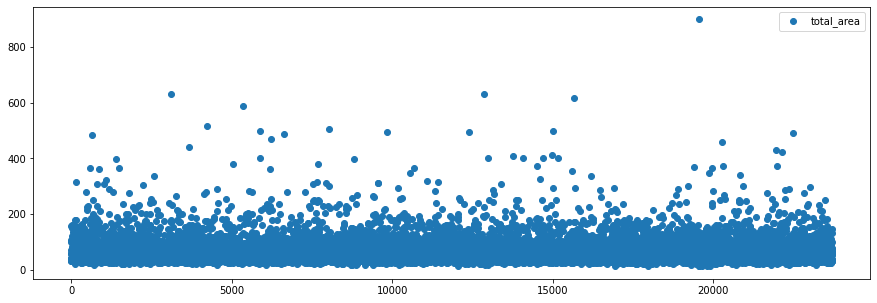

In [37]:
data.plot(y='total_area',figsize=(15,5), style='o')
plt.show()

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

Объявления с общей площадью более 200 $м^2$  не следует учитывать, т.к. это вряд ли квартиры, и менее 14 $м^2$, по нормам меньше быть не может.

In [38]:
data = data.loc[(data['total_area'] <= 200) & (data['total_area'] >= 14)]

In [39]:
data.shape

(23334, 23)

#### rooms

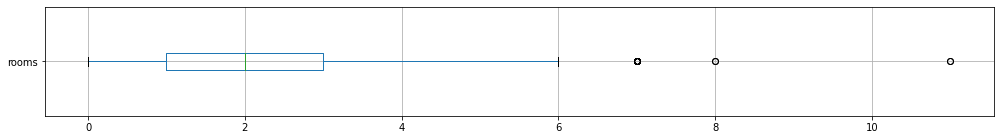

In [40]:
data.boxplot(column='rooms', figsize=(17,2), vert=False)
plt.show()

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
    
Квартиры с количеством комнат больше 6 можно удалить из-за малого количества.
Также можно поступить с объявлениями, у которых количество комнат равно 0 при условии, что это не студия или апартаменты.

In [41]:
# удаляем объявления с количеством комнат более 6
data = data.loc[(data['rooms'] <= 6)]

In [42]:
data['is_studio'].value_counts()

False    23164
True       146
Name: is_studio, dtype: int64

In [43]:
data['is_apartment'].value_counts()

False    23263
True        47
Name: is_apartment, dtype: int64

In [44]:
# удалем объявления, в которых не указано количество комнат, за исключением студий и апартаментов
data = data.loc[(data['rooms'] > 0) | (data['is_studio']) | (data['is_apartment'])]
data.shape

(23252, 23)

In [45]:
data['is_studio'].value_counts()

False    23106
True       146
Name: is_studio, dtype: int64

In [46]:
data['is_apartment'].value_counts()

False    23205
True        47
Name: is_apartment, dtype: int64

#### living_area, kitchen_area

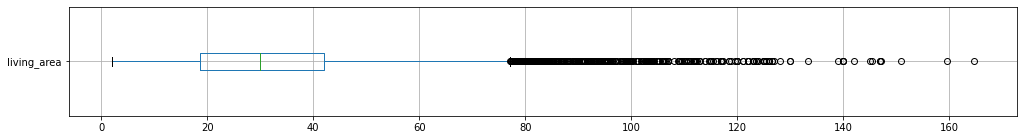

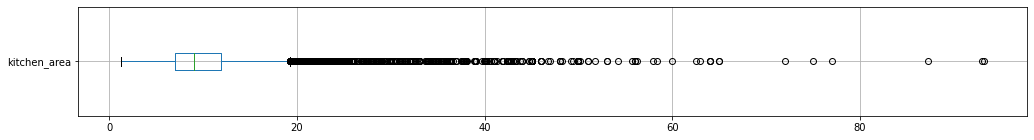

In [47]:
data.boxplot(column='living_area', figsize=(17,2), vert=False)
plt.show()
data.boxplot(column='kitchen_area', figsize=(17,2), vert=False)
plt.show()

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
    
Согласно СП 54.13330.2016 п.5.11, площадь жилых комнат и вспомогательных помещений в квартирах должна быть, $м^2$ , не
менее:
* 14 - общей жилой комнаты в однокомнатной квартире;
* 16 - общей жилой комнаты в квартирах с числом жилых комнат две и более;
* 8 - спальни (10 - на двух человек);
* 8 - кухни;
* 6 - кухонной зоны в кухне-столовой.

В однокомнатных квартирах допускается проектировать кухни или кухни-ниши площадью не
менее 5 $м^2$.

In [48]:
# создаем столбец с хорошей жилой площадью
data['good_living_area'] = data.loc[(data['living_area']>=8), 'living_area']
data['good_living_area'].describe()

count    21414.000000
mean        33.215065
std         17.173484
min          8.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        164.700000
Name: good_living_area, dtype: float64

In [49]:
# создаем столбец с хорошей площадью кухни
# т.к. мало данных с площадью кухни более 60 кв м, то их не учитываем
data['good_kitchen_area'] = data.loc[(data['kitchen_area']>=5) & (data['kitchen_area']<=60), 'kitchen_area']
data['good_kitchen_area'].describe()

count    21006.000000
mean        10.365578
std          5.120940
min          5.000000
25%          7.000000
50%          9.000000
75%         12.000000
max         60.000000
Name: good_kitchen_area, dtype: float64

#### last_price

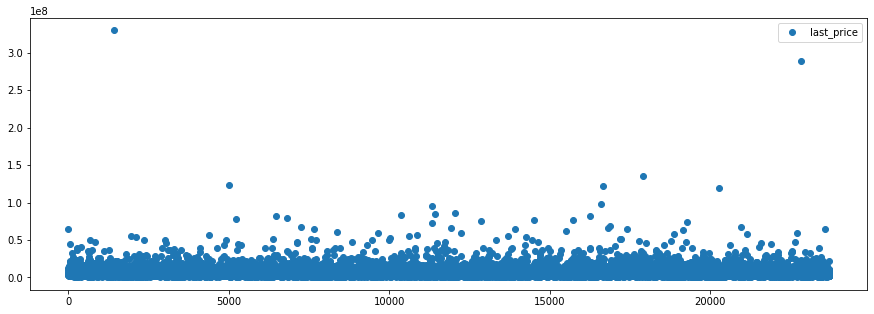

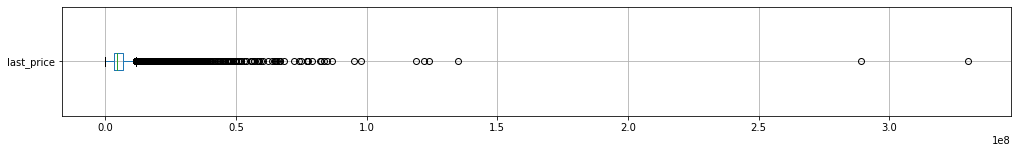

count    2.325200e+04
mean     6.018612e+06
std      6.238928e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64

In [50]:
# проверяем последние стоимости
data.plot(y='last_price',figsize=(15,5), style='o')
plt.show()
data.boxplot(column='last_price', figsize=(17,2), vert=False)
plt.show()
data['last_price'].describe()

In [51]:
# проверка количества слишком дешевых квартир
data[data['last_price']<=500000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,good_ceiling_height,good_living_area,good_kitchen_area
2097,9,500000.0,30.7,2019-04-30,1,NaN,2,15.1,2,False,False,False,7.4,0,деревня Чудской Бор,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.1,7.4
4405,9,500000.0,52.0,2018-08-02,2,2.70,2,31.0,1,False,False,False,8.0,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,110.0,2.70,31.0,8.0
5698,7,450000.0,42.0,2017-07-31,2,NaN,1,23.0,1,False,False,False,5.8,0,посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0,NaN,23.0,5.8
6859,6,490000.0,40.0,2017-12-11,1,NaN,5,NaN,3,False,False,False,NaN,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,43.0,NaN,NaN,NaN
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,2.75,32.0,40.5
9581,7,450000.0,43.4,2018-08-31,2,NaN,5,30.3,3,False,False,False,5.5,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0,NaN,30.3,5.5
10782,3,490000.0,29.1,2016-05-05,1,2.50,5,17.0,5,False,False,False,5.5,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,719.0,2.50,17.0,5.5
14295,4,500000.0,34.0,2016-02-09,1,NaN,5,17.0,4,False,False,False,8.0,1,посёлок Никольский,NaN,NaN,NaN,NaN,NaN,NaN,724.0,NaN,17.0,8.0
14904,3,500000.0,38.0,2018-02-08,1,NaN,3,NaN,3,False,False,False,NaN,0,деревня Бор,NaN,NaN,NaN,NaN,NaN,NaN,44.0,NaN,NaN,NaN
14911,5,430000.0,54.0,2018-06-26,2,NaN,3,NaN,3,False,False,False,NaN,0,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0,NaN,NaN,NaN


<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

У одной из квартир указана стоимость 12 т.р., при этом площадь составляет 109 $м^2$. Возможно, что цену указали в тыс. руб. 

In [52]:
# исправляем стоимость
data.loc[data['last_price'] == 12190, 'last_price'] = 12190 * 1000
# убираем пару квартир дороже 150 млн руб, т.к слишко выделяются из общей массы
data['last_price'] = data.loc[data['last_price'] <= 150000000, 'last_price']

In [53]:
data['last_price'].describe()

count    2.325000e+04
mean     5.993019e+06
std      5.564355e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.699750e+06
max      1.350000e+08
Name: last_price, dtype: float64

#### parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
    
В столбцах ***parks_around_3000***, ***ponds_around_3000*** есть пропущеные значения. Скорее всего, это значит, что в радиусе 3 км нет парков и прудов. Поэтому заполним пропуски 0.

In [54]:
# заменяем пропуски на 0
data.loc[data['parks_around_3000'].isna(), 'parks_around_3000'] = 0
data.loc[data['ponds_around_3000'].isna(), 'ponds_around_3000'] = 0
# меняем тип данных для этих столбцов на int для экономии памяти
data[['parks_around_3000','ponds_around_3000']] = data[['parks_around_3000','ponds_around_3000']].astype('int8')

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

Сведения по расстояниям до ближайших парков и прудов нам не доступны, поэтому оставляем пропуски.

#### airports_nearest, city_centers_nearest

In [55]:
data[['airports_nearest','city_centers_nearest']].describe()

,airports_nearest,city_centers_nearest
count,17763.000000,17783.000000
mean,28841.530935,14299.485801
std,12684.098036,8599.846469
min,0.000000,181.000000
25%,18497.000000,9442.000000
50%,26880.000000,13163.000000
75%,37366.000000,16316.500000
max,84869.000000,65968.000000


<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

Сведения по расстояниям до аэропортов и центров нам не доступны, поэтому оставляем пропуски.

In [56]:
# проверяем нет ли объявлений в аэропорту
data.query('airports_nearest <= 100')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,good_ceiling_height,good_living_area,good_kitchen_area
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9,19.8,3,False,False,False,6.0,2,Санкт-Петербург,0.0,22801.0,0,NaN,0,NaN,60.0,2.7,19.8,6.0


In [57]:
# удалем объявление, которое находится близко к аэропорту
data = data.query('airports_nearest != 0')

#### floor_total

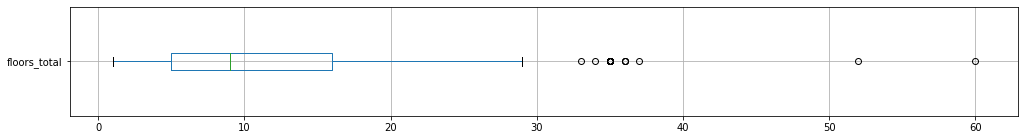

In [58]:
data.boxplot(column='floors_total', figsize=(17,2), vert=False)
plt.show()

In [59]:
# удалим объявления, в которых здания выше 40 этажей
data = data.loc[data['floors_total']<=40]

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23249 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23249 non-null  int64         
 1   last_price            23247 non-null  float64       
 2   total_area            23249 non-null  float64       
 3   first_day_exposition  23249 non-null  datetime64[ns]
 4   rooms                 23249 non-null  int64         
 5   ceiling_height        14304 non-null  float64       
 6   floors_total          23249 non-null  int64         
 7   living_area           21419 non-null  float64       
 8   floor                 23249 non-null  int64         
 9   is_apartment          23249 non-null  bool          
 10  is_studio             23249 non-null  bool          
 11  is_open_plan          23249 non-null  bool          
 12  kitchen_area          21120 non-null  float64       
 13  balcony         

#### days_exposition

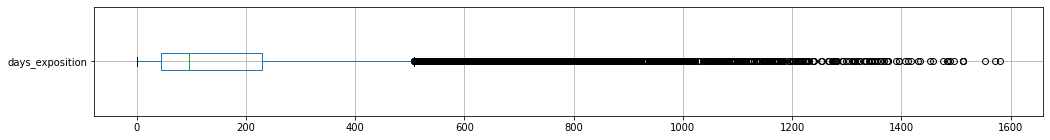

In [61]:
data.boxplot(column='days_exposition', figsize=(17,2), vert=False)
plt.show()

In [62]:
data.loc[data['days_exposition'] > 365*3, 'days_exposition'].count()

159

In [63]:
# уберем объявления, которые висят более 3 лет
data = data.loc[(data['days_exposition'] <= 365*3) | (data['days_exposition'].isna())]

In [64]:
data.loc[data['total_area'] < 14, 'total_area'].count()

0

#### check gap

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23090 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23090 non-null  int64         
 1   last_price            23088 non-null  float64       
 2   total_area            23090 non-null  float64       
 3   first_day_exposition  23090 non-null  datetime64[ns]
 4   rooms                 23090 non-null  int64         
 5   ceiling_height        14188 non-null  float64       
 6   floors_total          23090 non-null  int64         
 7   living_area           21271 non-null  float64       
 8   floor                 23090 non-null  int64         
 9   is_apartment          23090 non-null  bool          
 10  is_studio             23090 non-null  bool          
 11  is_open_plan          23090 non-null  bool          
 12  kitchen_area          20969 non-null  float64       
 13  balcony         

In [68]:
(data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 
       'last_price', 'living_area',  'kitchen_area','floor', 'floors_total']]
 .apply(['count', 'min', 'max', 'median'])
 .style.format("{:,.2f}"))

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,090.00","23,090.00","14,188.00","19,982.00","23,088.00","21,271.00","20,969.00","23,090.00","23,090.00"
min,0.00,14.00,1.00,1.00,"430,000.00",2.00,1.30,1.00,1.00
max,6.00,200.00,100.00,"1,095.00","135,000,000.00",164.70,93.20,33.00,37.00
median,2.00,51.65,2.65,93.00,"4,600,000.00",30.00,9.00,4.00,9.00


### Посчитайте и добавьте в таблицу новые столбцы

#### цена за квадратный метр

In [77]:
data = data.reset_index(drop=True)

In [78]:
data['price_m'] = data['last_price'] / data['total_area']
data['price_m'].describe()

count     23088.000000
mean      98156.713568
std       43439.563114
min        7962.962963
25%       76357.392418
50%       94777.667984
75%      113693.432897
max      995983.935743
Name: price_m, dtype: float64

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

Распределим квартиры по классам на основе стоимости $м^2$ и заполним пропуски в столбце ***good_ceiling_height***. Будет 4 класса: эконом, комфорт, бизнес, элитный.

In [79]:
bin_realty_class = ['эконом','комфорт','бизнес','элитный']
data['realty_class'] = pd.qcut(data['price_m'], 4 ,labels=bin_realty_class)
data.groupby('realty_class')['price_m'].agg(['min','max'], axis=1).style.format("{:,.2f}")

,min,max
realty_class,,
эконом,"7,962.96","76,354.68"
комфорт,"76,358.30","94,772.73"
бизнес,"94,782.61","113,692.31"
элитный,"113,696.81","995,983.94"


In [80]:
# заполняем пропуски в good_ceiling_height медианными значениями
data['good_ceiling_height'] = data['good_ceiling_height'].fillna(
    data.groupby('realty_class')['good_ceiling_height'].transform('median'))
data['good_ceiling_height'].describe()

count    23090.000000
mean         2.688513
std          0.214449
min          2.500000
25%          2.570000
50%          2.600000
75%          2.770000
max          6.000000
Name: good_ceiling_height, dtype: float64

#### день недели публикации объявления

<AxesSubplot:>

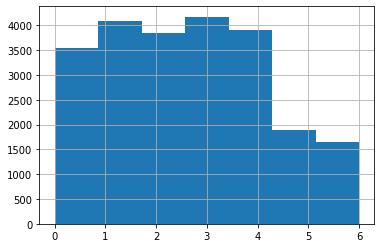

In [81]:
# день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['pub_day'] = data['first_day_exposition'].dt.weekday
data['pub_day'].hist(bins=7)

#### месяц публикации объявления

<AxesSubplot:>

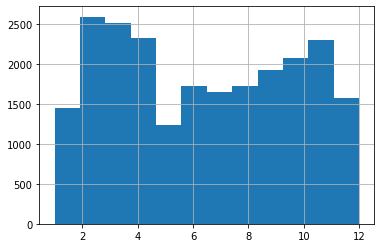

In [82]:
data['pub_month'] = data['first_day_exposition'].dt.month
data['pub_month'].hist(bins=12)

#### год публикации объявления

<AxesSubplot:>

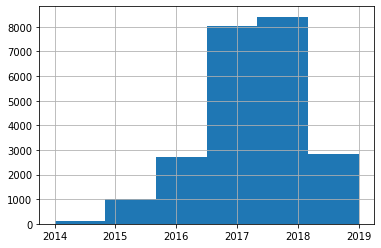

In [83]:
data['pub_year'] = data['first_day_exposition'].dt.year
data['pub_year'].hist(bins=6)

#### тип этажа квартиры

In [84]:
data['floor'].describe()

count    23090.000000
mean         5.883932
std          4.872647
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [85]:
# распределение по типам этажей
def floor_status(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [86]:
data['floor_type'] = data.apply(floor_status, axis=1)
data['floor_type'].value_counts()

другой       17000
последний     3222
первый        2868
Name: floor_type, dtype: int64

#### расстояние до центра города в километрах

In [87]:
# переводим из м в км и производим округление
data['city_centers_nearest_km'] = data['city_centers_nearest'] / 1000
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].round()
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,good_ceiling_height,good_living_area,good_kitchen_area,price_m,realty_class,pub_day,pub_month,pub_year,floor_type,city_centers_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,2.70,51.0,25.00,120370.370370,элитный,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,2.60,18.6,11.00,82920.792079,комфорт,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,2.60,34.3,8.30,92785.714286,комфорт,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,2.77,NaN,NaN,408176.100629,элитный,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,3.03,32.0,41.00,100000.000000,бизнес,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23085,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,3.70,73.3,13.83,72490.845228,эконом,1,3,2017,другой,4.0
23086,14,3100000.0,59.00,2018-01-15,3,NaN,5,38.0,4,False,False,False,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0,2.57,38.0,8.50,52542.372881,эконом,0,1,2018,другой,NaN
23087,18,2500000.0,56.70,2018-02-11,2,NaN,3,29.7,1,False,False,False,NaN,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN,2.57,29.7,NaN,44091.710758,эконом,6,2,2018,первый,NaN
23088,13,11475000.0,76.75,2017-03-28,2,3.00,17,NaN,12,False,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0,3.00,NaN,23.30,149511.400651,элитный,1,3,2017,другой,10.0


### Проведите исследовательский анализ данных

#### общая площадь

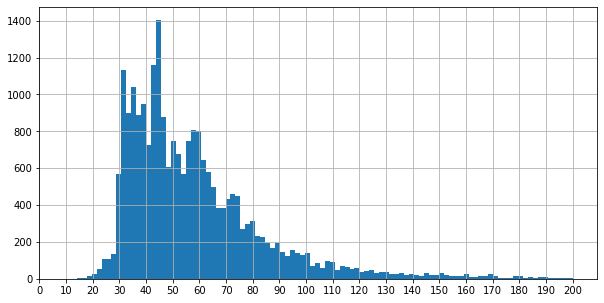

In [88]:
data['total_area'].hist(bins=100, figsize=(10,5))
plt.xticks(range(0,201,10));

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
    
В основном продяются квартиры площадью 30-80 $м^2$. В этом нет ничего удивительного, это квартиры массового строительства.

#### жилая площадь

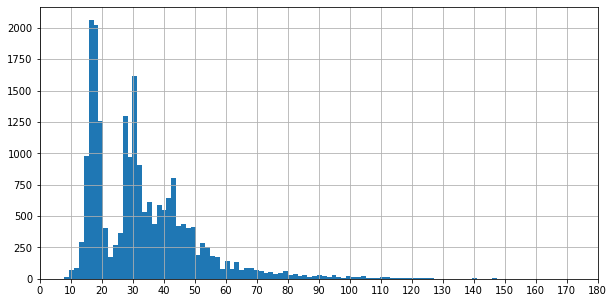

In [89]:
data['good_living_area'].hist(bins=100, figsize=(10,5))
plt.xticks(range(0,190,10));

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
    
Здесь наблюдаются провалы в диапазонах 20-30 $м^2$ и 30-40 $м^2$. Довольно странно, но возможно это связано с распространением типового строительства, а также с тем, что каждая жилая комната добавляет примерно 10 $м^2$, из-за этого пики возле 20, 30, 40 $м^2$.

#### площадь кухни

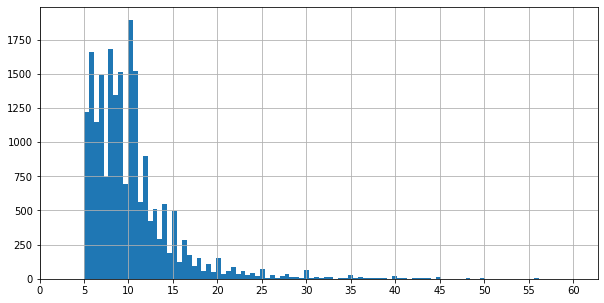

In [90]:
data['good_kitchen_area'].hist(bins=100, figsize=(10,5))
plt.xticks(range(0,65,5));

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
    
Распространены кухни площадью 5-15 $м^2$, остальные представлены редко, возможно это бизнес и элитное жилье.  

#### цена объекта

<AxesSubplot:>

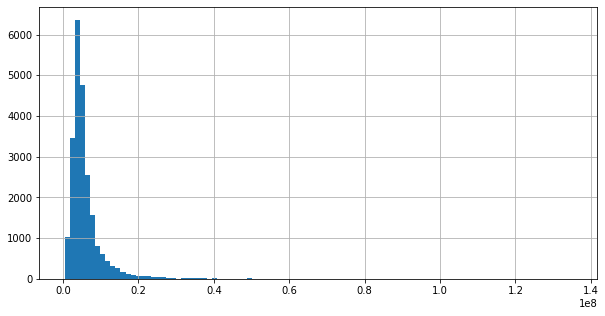

In [91]:
data['last_price'].hist(bins=100, figsize=(10,5))

(0.0, 60000000.0)

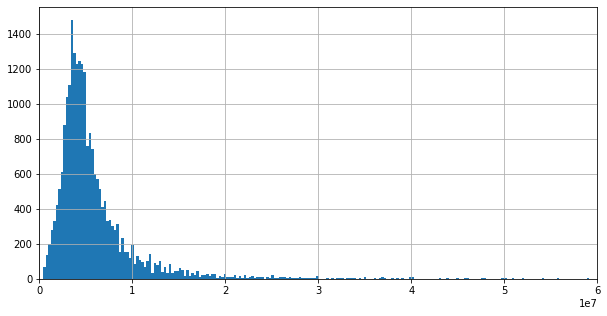

In [92]:
# рассмотрим гистограмму в диапазоне от 0 до 60 млн руб
data['last_price'].hist(bins=500,figsize=(10,5))
plt.xlim(0,60000000)

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
    
Основной пласт объявлений находится в диапазоне до 15 млн руб.

#### количество комнат

<AxesSubplot:>

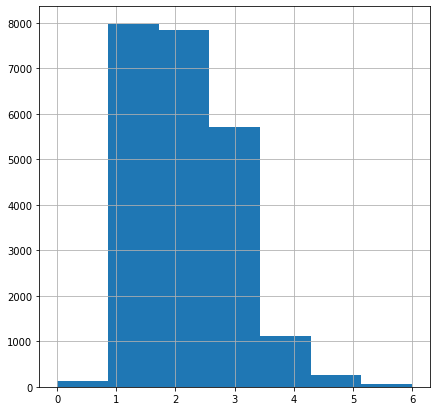

In [93]:
data['rooms'].hist(bins=7, figsize=(7,7))

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

Больше всего продается квартир с 1-3 комнатами.

#### высота потолков

<AxesSubplot:>

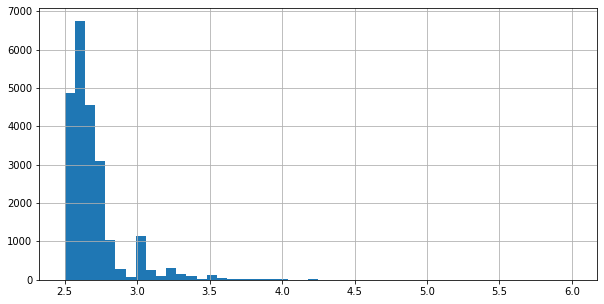

In [94]:
data['good_ceiling_height'].hist(bins=50, figsize=(10,5))

(2.5, 4.5)

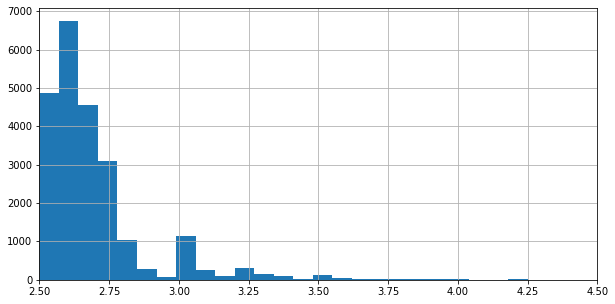

In [95]:
# рассмотрим гистограмму в диапазоне от 2,5 до 4,5 м
data['good_ceiling_height'].hist(bins=50,figsize=(10,5))
plt.xlim(2.5,4.5)

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
    
Основная высота потолков составляет 2,5 - 3 м.

#### этаж квартиры

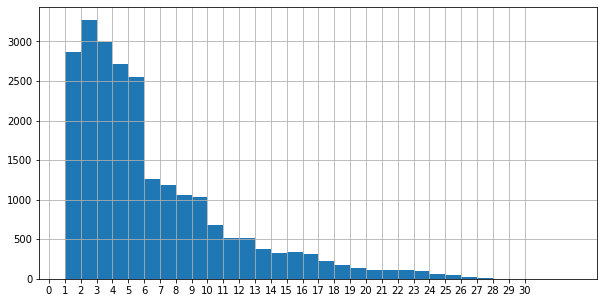

In [96]:
data['floor'].hist(bins=32, figsize=(10,5))
plt.xticks(range(0,31,1));

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
    
Наиболее часто продают квартиры на 1 - 5 этажах.

#### тип этажа квартиры

<AxesSubplot:>

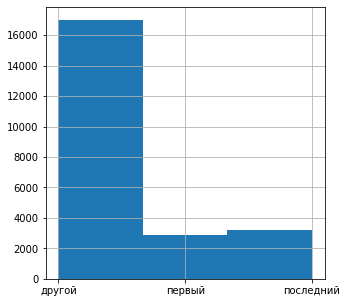

In [97]:
data['floor_type'].hist(bins=3, figsize=(5,5))

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
    
Последние этажи продают чаще, чем первые.

#### общее количество этажей в доме

In [98]:
data['floors_total'].describe()

count    23090.000000
mean        10.704374
std          6.582986
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

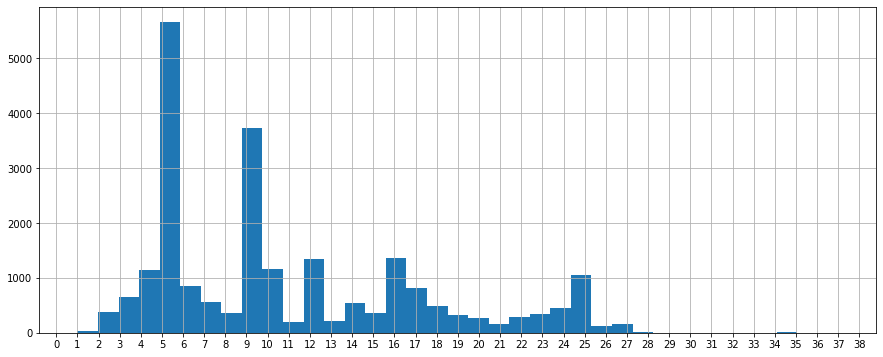

In [99]:
data['floors_total'].hist(bins=37, figsize=(15,6))
plt.xticks(range(0,39,1));

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
    
Чаще всего продают дома в пяти- и девятиэтажных зданиях. Возможно, это связано с тем, что такие дома старые. Такие строились в основном в прошлом веке.

#### расстояние до центра города в метрах

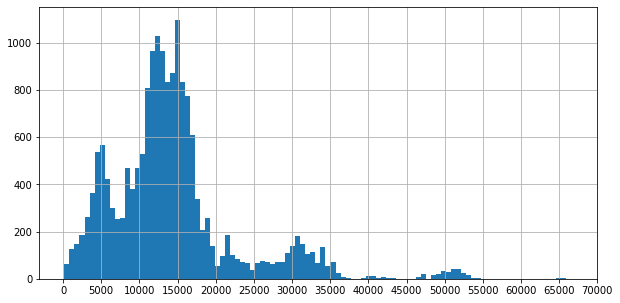

In [100]:
data['city_centers_nearest'].hist(bins=100, figsize=(10,5))
plt.xticks(range(0,71000,5000));

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

В основном продают квартиры в 3-18 км от центра. Пристутствует провал продаж в районе 6-8 км от центра города.

#### расстояние до ближайшего аэропорта

<AxesSubplot:>

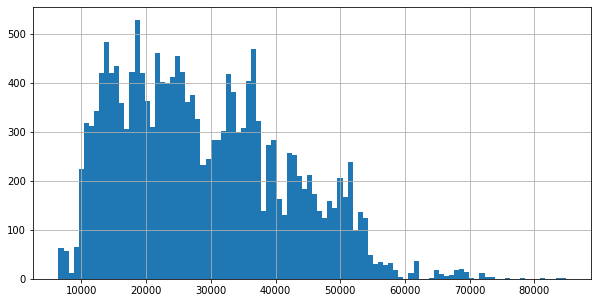

In [101]:
data['airports_nearest'].hist(bins=100, figsize=(10,5))

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

Большинство квартир расположено дальше 10 км от аэропорта. 

#### расстояние до ближайшего парка

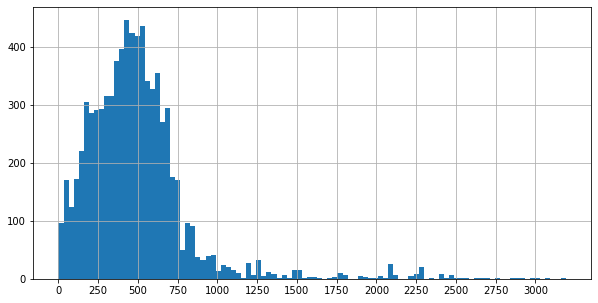

In [102]:
data['parks_nearest'].hist(bins=100, figsize=(10,5))
plt.xticks(range(0,3200,250));

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

Многие квартиры находятся близко к паркам (менее 1 км).

#### день и месяц публикации объявления

<AxesSubplot:>

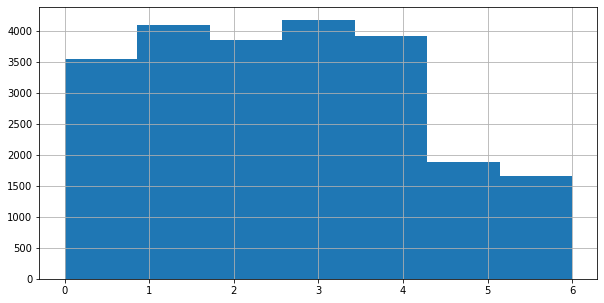

In [103]:
data['pub_day'].hist(bins=7, figsize=(10,5))

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

В выходные реже публикуют объявления.

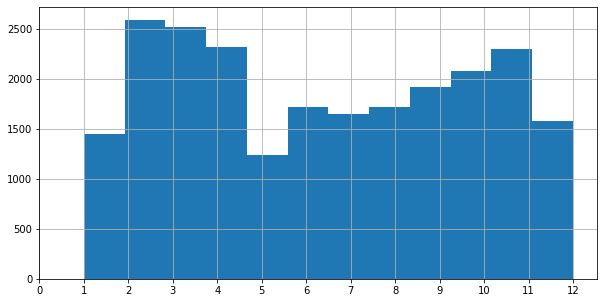

pub_month
2     2591
3     2516
4     2321
11    2305
10    2079
9     1920
6     1722
8     1718
7     1650
12    1578
1     1452
5     1238
dtype: int64

In [104]:
data['pub_month'].hist(bins=12, figsize=(10,5))
plt.xticks(range(0,13,1));
plt.show()
data.value_counts(subset='pub_month')

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

Реже всего объявления выставляют в с декабря по январь и с мая по август. Возможно, это связано с тем, что люди в эти периоды обычно отдыхают (новогодние праздники и дачный сезон).

#### как быстро продавались квартиры

In [105]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,good_ceiling_height,good_living_area,good_kitchen_area,price_m,realty_class,pub_day,pub_month,pub_year,floor_type,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,2.70,51.0,25.0,120370.370370,элитный,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,2.60,18.6,11.0,82920.792079,комфорт,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,2.60,34.3,8.3,92785.714286,комфорт,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,2.77,NaN,NaN,408176.100629,элитный,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,3.03,32.0,41.0,100000.000000,бизнес,1,6,2018,другой,8.0


In [106]:
data['days_exposition'].describe()

count    19982.000000
mean       171.367331
std        197.188150
min          1.000000
25%         44.000000
50%         93.000000
75%        224.000000
max       1095.000000
Name: days_exposition, dtype: float64

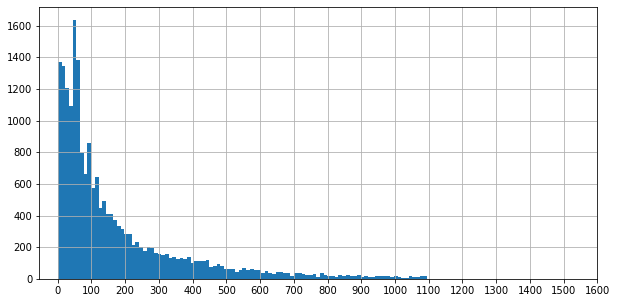

In [107]:
# строим гистограмму как быстро продавались квартиры
data['days_exposition'].hist(bins=100, figsize=(10,5))
plt.xticks(range(0,1650,100));

In [108]:
# считаем среденее и медианное время продаж квартир разных классов
data.groupby('realty_class')['days_exposition'].agg(['mean','median'])

,mean,median
realty_class,,
эконом,178.601157,101.0
комфорт,168.813887,93.0
бизнес,159.588813,88.0
элитный,179.438844,95.0


In [109]:
# считаем среденее и медианное время продаж квартир по годам
data.groupby('pub_year')['days_exposition'].agg(['mean','median'])

,mean,median
pub_year,,
2014,761.481928,718.0
2015,573.589041,529.0
2016,320.424782,235.0
2017,159.130850,103.0
2018,94.058690,63.0
2019,30.898510,23.0


In [110]:
# считаем среденее и медианное время продаж апартаментов
data.loc[data['is_apartment'],'days_exposition'].agg(['mean','median'])

mean      178.382353
median     58.000000
Name: days_exposition, dtype: float64

In [111]:
# считаем среденее и медианное время продаж студий
data.loc[data['is_studio'],'days_exposition'].agg(['mean','median'])

mean      122.015152
median     55.500000
Name: days_exposition, dtype: float64

In [112]:
# считаем среденее и медианное время продаж квартир с открытой планировкой
data.loc[data['is_open_plan'],'days_exposition'].agg(['mean','median'])

mean      168.375
median     89.500
Name: days_exposition, dtype: float64

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

Большинство квартир продаются в течение года. Быстрее всех продаются квартиры бизнес-класса, после идут комфорт-класса. Элитные и эконом продаются хуже остальных.
    
Средние значения отличаются от медианных почти в 2 раза. Это связано с тем, что присутствует некоторое количество объявлений с большим временем продажи.
    
После 14-го года время продаж уменьшалось. С чем это связано предстоит выяснить.

В среднем апартаменты и квартиры со свободной планировкой продаются дольше, чем студии.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта

In [114]:
data_corr = data[['last_price',\
           'total_area',\
           'days_exposition',\
           'city_centers_nearest_km',\
           'rooms',\
           'good_living_area',\
           'good_kitchen_area']].corr()
data_corr.style.background_gradient(cmap='coolwarm').format('{:,.2f}')

,last_price,total_area,days_exposition,city_centers_nearest_km,rooms,good_living_area,good_kitchen_area
last_price,1.00,0.71,0.10,-0.30,0.42,0.60,0.54
total_area,0.71,1.00,0.14,-0.24,0.78,0.92,0.56
days_exposition,0.10,0.14,1.00,-0.05,0.11,0.13,0.09
city_centers_nearest_km,-0.30,-0.24,-0.05,1.00,-0.16,-0.23,-0.19
rooms,0.42,0.78,0.11,-0.16,1.00,0.87,0.19
good_living_area,0.60,0.92,0.13,-0.23,0.87,1.00,0.32
good_kitchen_area,0.54,0.56,0.09,-0.19,0.19,0.32,1.00


##### общая площадь

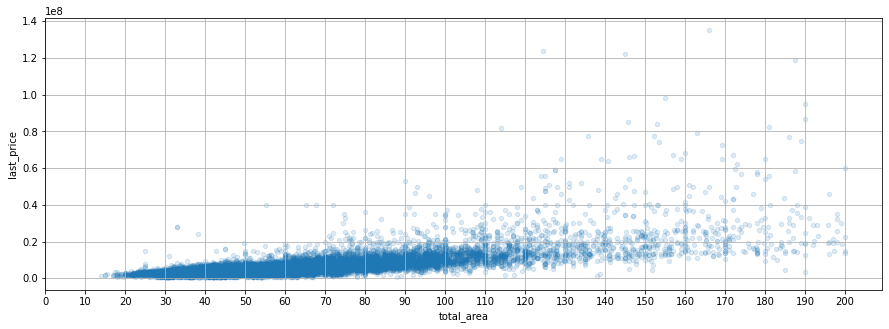

In [115]:
# общая площадь
data.plot(x='total_area', y='last_price', kind='scatter', figsize=(15,5), grid=True, alpha=0.15)
plt.xticks(range(0,210,10))
plt.show()

##### жилая площадь

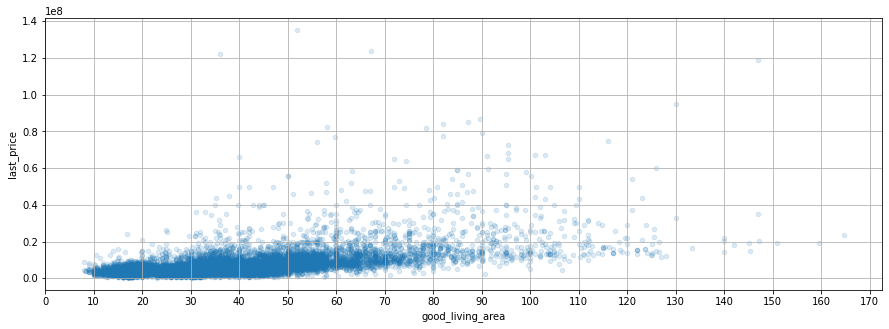

In [116]:
# жилая площадь
data.plot(x='good_living_area', y='last_price', kind='scatter', figsize=(15,5), grid=True, alpha=0.15)
plt.xticks(range(0,180,10))
plt.show()


##### площадь кухни

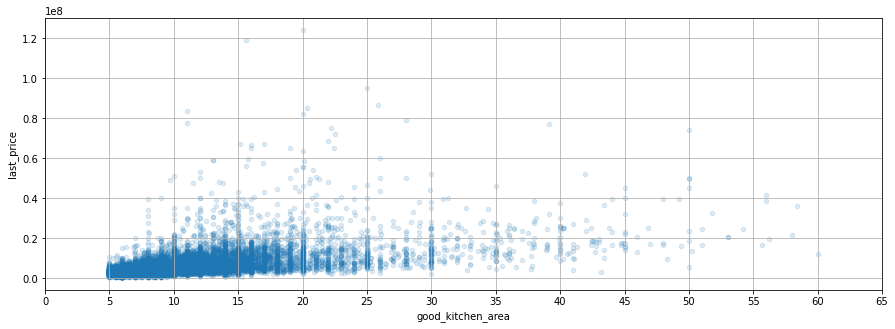

In [117]:
# площадь кухни
data.plot(x='good_kitchen_area', y='last_price', kind='scatter', figsize=(15,5), grid=True, alpha=0.15)
plt.xticks(range(0,70,5))
plt.show()

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

Сильнее всего на стоимость квартиры влияет общая площадь, менее - жилая площадь и площадь кухни.

In [118]:
# фунция отношения цены к фактору
def rel_price(df,col):
    df_pivot = df.pivot_table(index=col, values='last_price', aggfunc=['mean','median'])
    df_pivot.plot(xticks=df_pivot.index, title=f'Зависимость цены от {col}', grid=True, figsize=(15,7))
    plt.show()
    data.plot(x='last_price', y=col, kind='scatter', figsize=(15,7), alpha=0.2, grid=True)
    plt.show()

##### количество комнат

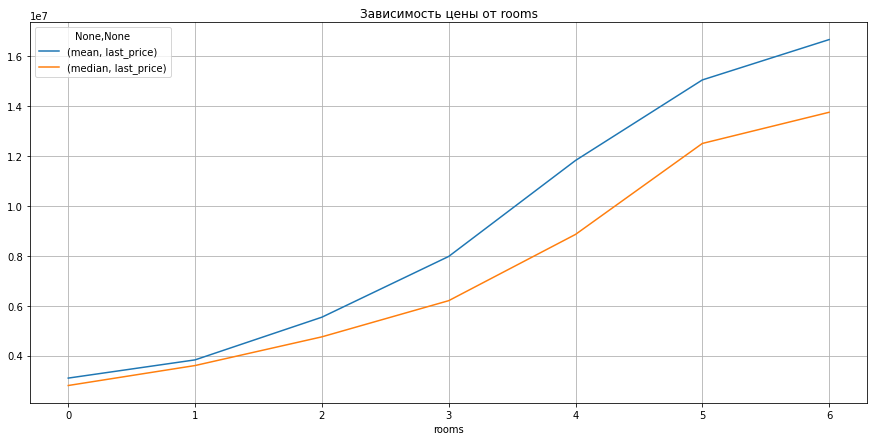

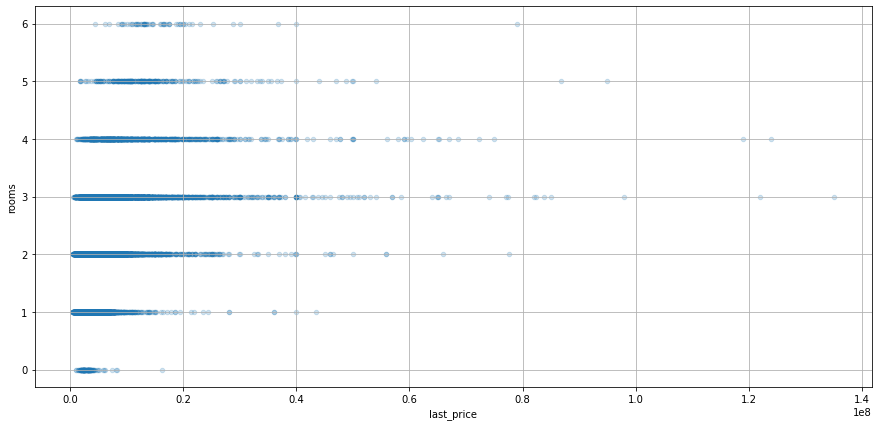

In [119]:
rel_price(data, 'rooms')

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

Средняя и медианная цены зависят от количества комнат, но по графику рассеяния видно, что нередко встречаются 3-комнатные квартиры, которые дороже 4-, 5-, 6-комнатных.

##### этаж (первый, последний, другой)

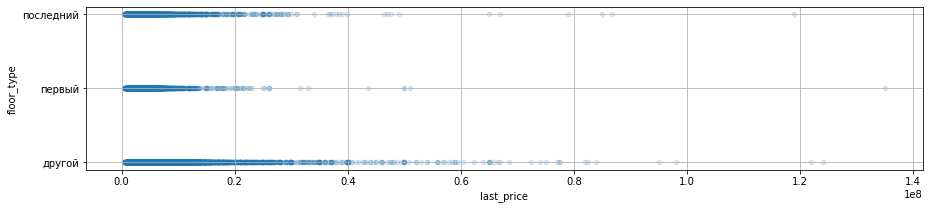

,mean,median
floor_type,,
другой,6.253718e+06,4800000.0
первый,4.608013e+06,3900000.0
последний,5.715616e+06,4250000.0


In [120]:
# этаж, на котором расположена квартира (первый, последний, другой)
data.plot(x='last_price', y='floor_type', kind='scatter', figsize=(15,3), grid=True, alpha=0.15)
plt.show()
data.groupby('floor_type')['last_price'].agg(['mean','median'])

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

Квартиры на первых этажах имеют более низкую цену.

##### день публикации

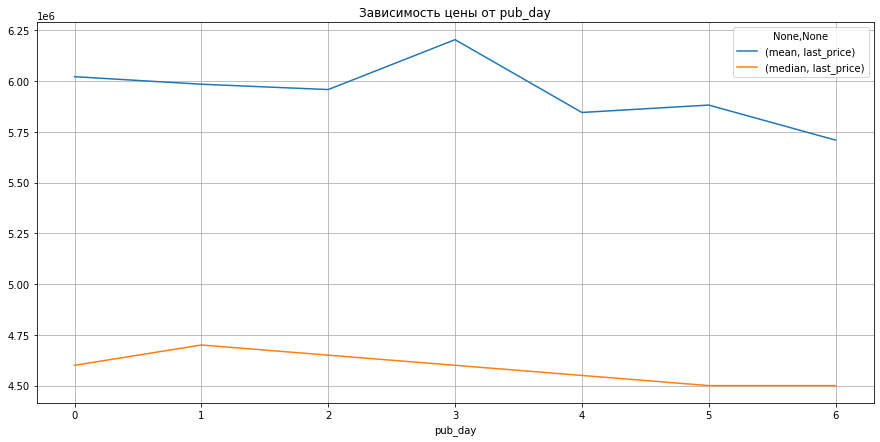

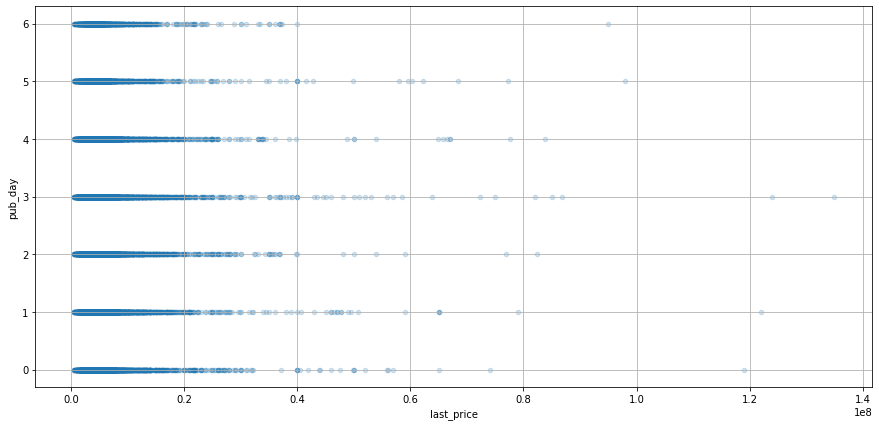

In [121]:
rel_price(data, 'pub_day')

##### месяц публицкации

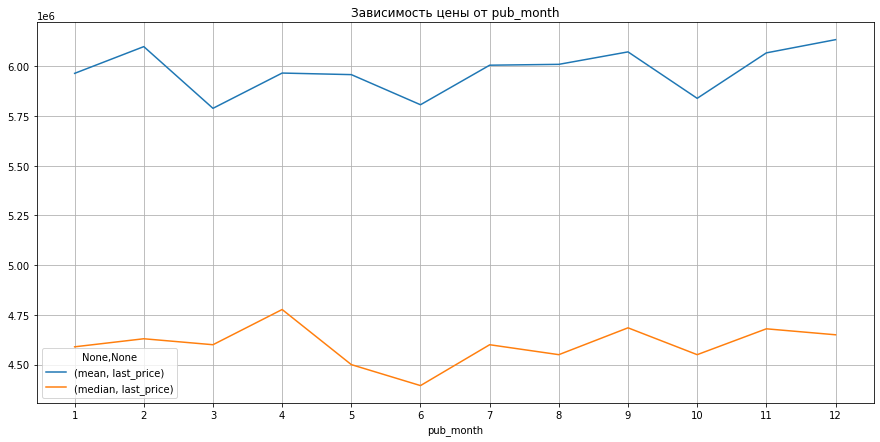

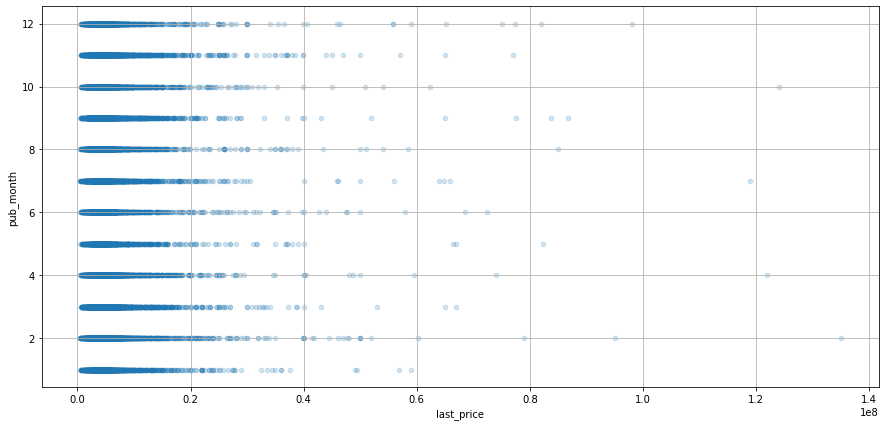

In [122]:
rel_price(data, 'pub_month')

##### год публикации

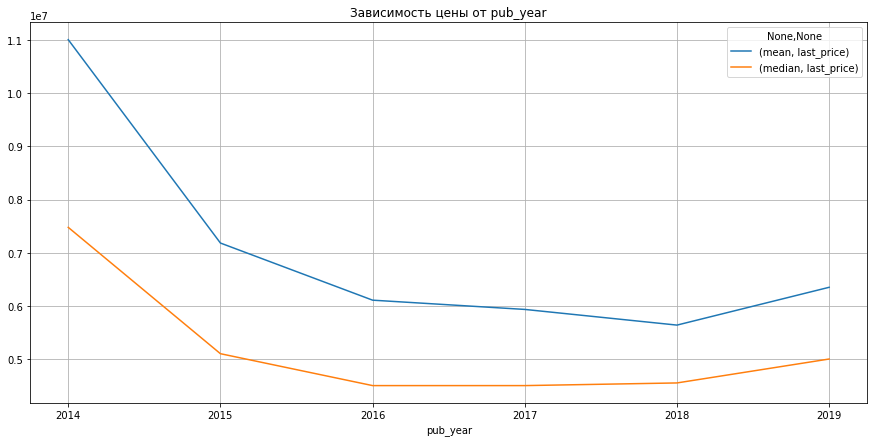

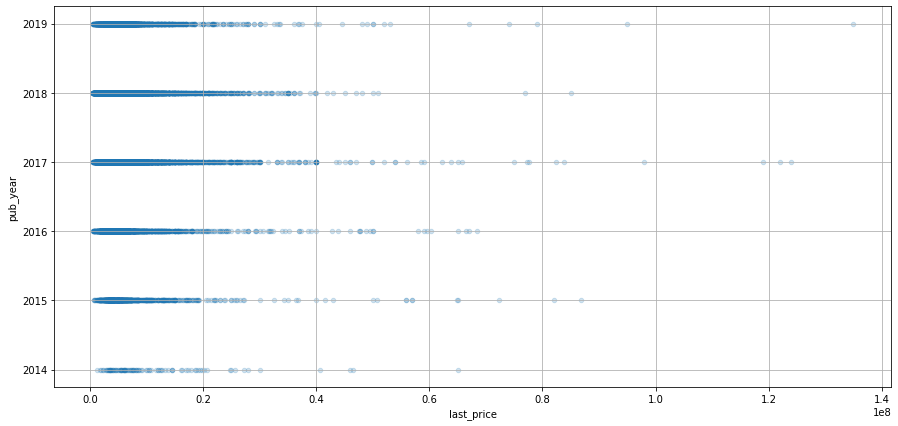

In [123]:
rel_price(data, 'pub_year')

In [124]:
data.groupby('pub_year')['total_area'].agg(['mean','median'])

,mean,median
pub_year,,
2014,83.220792,75.00
2015,65.317864,58.00
2016,59.681791,53.00
2017,58.279839,51.66
2018,56.303944,50.20
2019,57.163605,51.40


<AxesSubplot:>

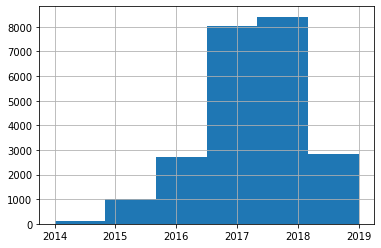

In [125]:
data['pub_year'].hist(bins=6)

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

День и месяц публикации не влияют на стоимость квартир. Но при этом средняя и медианная цена менялись каждый год. Это связано, в основном, с тем, что после 14-го года площади квартир стали уменьшаться, а количество объявлений возросло. 

#### 10 населённых пунктах с наибольшим числом объявлений

In [126]:
top_loc = data.loc[data['locality_name'].isin(data['locality_name'].value_counts().index[:10])]
top_loc

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,good_ceiling_height,good_living_area,good_kitchen_area,price_m,realty_class,pub_day,pub_month,pub_year,floor_type,city_centers_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,2.70,51.0,25.00,120370.370370,элитный,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,2.60,18.6,11.00,82920.792079,комфорт,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,2.60,34.3,8.30,92785.714286,комфорт,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,2.77,NaN,NaN,408176.100629,элитный,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,3.03,32.0,41.00,100000.000000,бизнес,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23080,13,3550000.0,35.30,2018-02-28,1,2.86,15,16.3,4,False,False,False,9.10,2,Санкт-Петербург,17284.0,16081.0,1,353.0,2,652.0,29.0,2.86,16.3,9.10,100566.572238,бизнес,2,2,2018,другой,16.0
23081,3,5500000.0,52.00,2018-07-19,2,NaN,5,31.0,2,False,False,False,6.00,0,Санкт-Петербург,20151.0,6263.0,1,300.0,0,NaN,15.0,2.65,31.0,6.00,105769.230769,бизнес,3,7,2018,другой,6.0
23082,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,False,False,False,10.60,1,Санкт-Петербург,19424.0,4489.0,0,NaN,1,806.0,519.0,2.75,40.3,10.60,129903.978052,элитный,3,10,2016,другой,4.0
23085,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,3.70,73.3,13.83,72490.845228,эконом,1,3,2017,другой,4.0


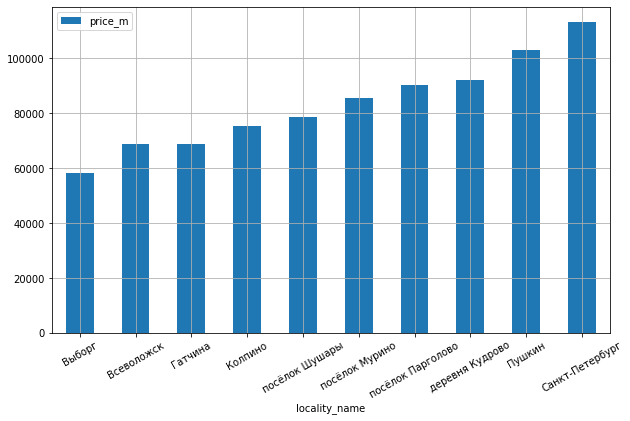

,price_m
locality_name,
Выборг,"58,141.91"
Всеволожск,"68,674.62"
Гатчина,"68,746.15"
Колпино,"75,310.77"
посёлок Шушары,"78,509.29"
посёлок Мурино,"85,507.92"
посёлок Парголово,"90,275.85"
деревня Кудрово,"92,291.74"
Пушкин,"103,196.70"


In [127]:
top_loc_pivot = top_loc.pivot_table(index='locality_name', values='price_m',aggfunc='mean').sort_values(by='price_m')
top_loc_pivot.plot(kind='bar', figsize=(10,6),grid=True, rot = 30)
plt.show()
top_loc_pivot.style.format('{:,.2f}')

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

Самая высокая стоимость $м^2$ в Санкт-Петербурге, самая низкая - в Выборге.

#### средняя цена каждого километра

,last_price
city_centers_nearest_km,
0.0,"23,028,155.30"
1.0,"12,697,024.24"
2.0,"13,698,861.49"
3.0,"10,150,559.00"
4.0,"10,781,777.56"


<AxesSubplot:xlabel='city_centers_nearest_km'>

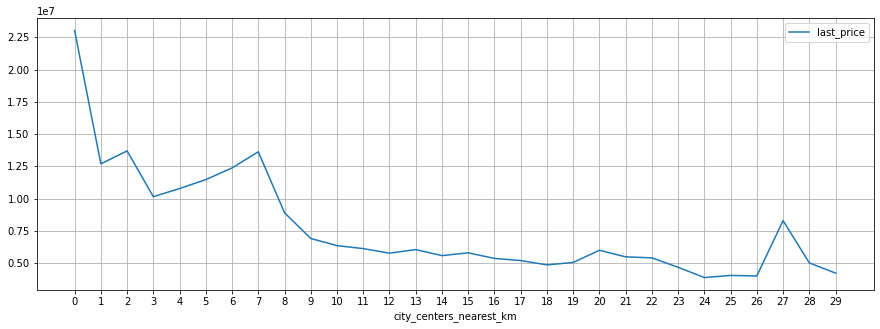

In [128]:
spb_km = data.loc[data['locality_name'] == 'Санкт-Петербург']
spb_km_pivot = spb_km.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')
display(spb_km_pivot.head().style.format('{:,.2f}'))
spb_km_pivot.plot(figsize=(15,5), grid=True, xticks=spb_km_pivot.index)

In [129]:
# проверка выброса на 27 км
spb_km.loc[spb_km['city_centers_nearest_km']==27]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,good_ceiling_height,good_living_area,good_kitchen_area,price_m,realty_class,pub_day,pub_month,pub_year,floor_type,city_centers_nearest_km
726,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,False,False,25.0,0,Санкт-Петербург,23888.0,27313.0,1,1496.0,0,NaN,128.0,3.13,30.0,25.0,193918.918919,элитный,1,11,2017,другой,27.0
5805,6,2250000.0,32.0,2018-02-27,1,NaN,2,16.5,2,False,False,False,7.0,0,Санкт-Петербург,24006.0,27431.0,0,NaN,0,NaN,178.0,2.57,16.5,7.0,70312.500000,эконом,1,2,2018,последний,27.0


In [130]:
def percent_fl_on_km(km):
    vc = spb_km.loc[spb_km['city_centers_nearest_km']==km].value_counts(subset='floor_type')
    print(f'Количество квартир по типам этажей на {km} км:')
    display(vc)
    vc_sum = vc.sum()
    print(f'Доли квартир на {km} км:')
    display(vc * 100 / vc_sum)

In [131]:
percent_fl_on_km(3)

Количество квартир по типам этажей на 3 км:


floor_type
другой       203
последний     72
первый        53
dtype: int64

Доли квартир на 3 км:


floor_type
другой       61.890244
последний    21.951220
первый       16.158537
dtype: float64

In [132]:
percent_fl_on_km(5)

Количество квартир по типам этажей на 5 км:


floor_type
другой       636
последний    125
первый        77
dtype: int64

Доли квартир на 5 км:


floor_type
другой       75.894988
последний    14.916468
первый        9.188544
dtype: float64

In [133]:
percent_fl_on_km(7)

Количество квартир по типам этажей на 7 км:


floor_type
другой       318
последний     58
первый        32
dtype: int64

Доли квартир на 7 км:


floor_type
другой       77.941176
последний    14.215686
первый        7.843137
dtype: float64

In [134]:
def percent_class_on_km(km):
    vc = spb_km.loc[spb_km['city_centers_nearest_km']==km].value_counts(subset='realty_class')
    print(f'Количество квартир по классам недвижимости на {km} км:')
    display(vc)
    vc_sum = vc.sum()
    print(f'Доли квартир на {km} км:')
    display(vc * 100 / vc_sum)

In [135]:
percent_class_on_km(3)

Количество квартир по классам недвижимости на 3 км:


realty_class
элитный    145
бизнес      91
комфорт     82
эконом      10
dtype: int64

Доли квартир на 3 км:


realty_class
элитный    44.207317
бизнес     27.743902
комфорт    25.000000
эконом      3.048780
dtype: float64

In [136]:
percent_class_on_km(5)

Количество квартир по классам недвижимости на 5 км:


realty_class
элитный    517
бизнес     168
комфорт    128
эконом      25
dtype: int64

Доли квартир на 5 км:


realty_class
элитный    61.694511
бизнес     20.047733
комфорт    15.274463
эконом      2.983294
dtype: float64

In [137]:
percent_class_on_km(7)

Количество квартир по классам недвижимости на 7 км:


realty_class
элитный    259
бизнес      92
комфорт     51
эконом       6
dtype: int64

Доли квартир на 7 км:


realty_class
элитный    63.480392
бизнес     22.549020
комфорт    12.500000
эконом      1.470588
dtype: float64

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

Чем ближе к центру, тем выше стоимость квартиры.
    
На 27 км всего 2 объявления, они сильно разнятся в стоимости, поэтому случился выброс. Если брать только дешевое объявление, то тенденция к снижению стоимости сохраняется
    
Выброс на 7 км появился из-за большого количества элитного жилья. На 3 км этот разрыв в количестве уменьшается.

### Общий вывод

Был изучен и проанализирован датасет объявлений о продаже недвижимости в Санкт-Петербурге и окрестностях, размещенных за период с конца 2014-го по середину 2019-го года.
На продажу выставлена недвижимость разного ценового диапозона
Основные факторы, влияющие на стоимость квартиры:
* общая площадь;
* жилая площадь и площадь кухни;
* количество комнат;
* этаж.

Также замечено, что средняя стоимость недвижимости меняется каждый год. Это связано, в основном, с тем, что после 14-го года площади квартир стали уменьшаться, а количество объявлений возросло.

При изучении продаж выявлено топ-10 городов в Ленинградской области по количеству объявлений. Среди них Санкт-Петербург занимает первое место по дороговизне $м^2$.

Исследована зависимость стоимости $м^2$ от расстояния до центра города. Чем ближе к центру, тем выше стоимость $м^2$.